root =  -5.34916662328517


Text(0.5, 1.0, 'number of iterations as a function of the bounds')

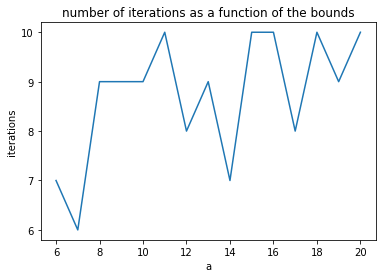

In [38]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

def main(upper_bound):

    # Define your function
    def function(x):
        return ((x + 5)**3 + x + 5) / ((x + 5)**4 + 1) + (x + 11/2) * exp(cos(x + 5))
    
    # Define the symbolic variable
    x = Symbol('x')

    # Derivative of the function
    f = ((x + 5)**3 + x + 5) / ((x + 5)**4 + 1) + (x + 11/2) * exp(cos(x + 5))

    f1 = diff(f, x)

    # Bounds for bisection method
    lower_bound = -upper_bound

    # midpoint is the middle of the bounds
    #mid_value is the function at the midpoint
    midpoint = 0
    mid_value = 1

    iterations = 0

    #keeps iterating over the midpoint to find a closer approximation
    #and continues while the y value of the function is larger than 0.5
    while (abs(mid_value) > 0.5):

        midpoint = (upper_bound + lower_bound) / 2

        #keeps checking function value at the midpoint
        mid_value = function(midpoint)

        iterations += 1

        # If the signs are equal, then the lower bound can be used as the new midpoint
        if sign(mid_value) == sign(function(lower_bound)):
            lower_bound = midpoint
        else:
            #else the upper bound can be used as the new midpoint
            upper_bound = midpoint


    #this is the result of the bisection methos
    #and will be used as the guess for Newton's method    
    new_root = midpoint


    # Newton's method is used to get a better and more stable approximation
    for i in range(1000):
        #new root will be the approximate root of the function
        new_root = new_root - function(new_root) / f1.subs(x, new_root)

        iterations += 1

        #checks if the root is accurate to enough digits
        if (abs(function(new_root)) < 10**(-15)):
            break

    # Evaluate the function at the root
    function_at_root = function(new_root)
    #print(new_root)
    
    return iterations,new_root
  
#a holds the bounds
#iter holds the number of iterations
a = []
iter = []
func_output = []

#this fills in the number of iterations and the actual root
for i in range(6,20+1):
    a.append(i)
    func_output.append(main(i))
    iter.append(func_output[i-6][0])

print('root = ',func_output[2][1])    
plt.plot(a,iter)
plt.xlabel('a')
plt.ylabel('iterations')  
plt.yticks(np.arange(min(iter),max(iter)+1,1))
plt.title('number of iterations as a function of the bounds')

The method I used to find the roots started with bisection. I made that accurate to about one decimal place. I then used this value as my initial guess for Newton's method. This allowed me to have such a low number of iterations because Newton's method only needed about two iterations with such a good guess.

In the graph, the number of iterations fluctuates as a function of the bounds. Without sacrificing accuracy, I was able to get only 6 iterations with a guess of (-7,7). My maximum number of iterations occured a few times, but it was only 10.

Secant iterations = [17, 7, 5, 6, 13, 12]
Newton iterations = [1000, 5, 3, 4, 11, 9]
Secant root = [-5.34916662328517, -5.34916662328517, -5.34916662328517, -5.34916662328517, -5.34916662328517, -5.34916662328517]
Newton root = [-1031.40200919100, -5.34916662328517, -5.34916662328517, -5.34916662328517, -5.34916662328517, -5.34916662328517]


<function matplotlib.pyplot.show(close=None, block=None)>

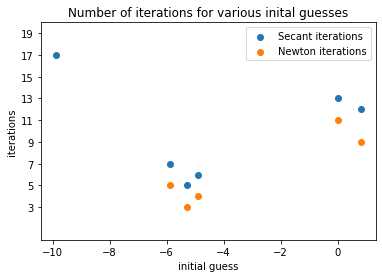

In [40]:
def main2(guess):   

    guess2 = guess+0.0001

    def function(x):
        return ((x + 5)**3 + x + 5) / ((x + 5)**4 + 1) + (x + 11/2) * exp(cos(x + 5))

    #this is used as the first two values in the secant method
    root = [guess,guess2]

    #this is iterated over in Secant's method
    iter_root = 0

    #answer becomes the output of the function at the root
    #and is used to check the accuracy of the root
    answer = 1
    #counts the iterations in Secant's method
    iter_sec = 0

    while(abs(answer) > 10**(-8)):
        iter_root = root[iter_sec] - function(root[iter_sec])*(root[iter_sec]-root[iter_sec+1])/(function(root[iter_sec])-function(root[iter_sec+1]))

        #the last element in root will contain the most accurate approximation
        root.append(iter_root)

        #used to check the accuracy in the while loop
        answer = function(root[iter_sec])

        iter_sec += 1
        
        #maximum iterations
        if(iter_sec > 1000):
            break
       
    #holds the approximate root from Secant's method
    sec_root = root[-1]


    # Derivative of the function
    x = Symbol('x')
    
    ef = ((x + 5)**3 + x + 5) / ((x + 5)**4 + 1) + (x + 11/2) * exp(cos(x + 5))

    ef1 = diff(ef, x)   


    #the inital guess for Newton's method
    newt_root = guess
    iter_newt = 0
    
    # Newton's method is used to get a better and more stable approximation
    for i in range(1000):
        newt_root = newt_root - function(newt_root) / ef1.subs(x, newt_root)

        iter_newt += 1

        #checks the accuracy of Newton's method
        if (abs(function(newt_root)) < 10**(-15)):
            break


    # Evaluate the function at the root
    funct_at_root = function(newt_root)
    
    return sec_root, newt_root, iter_sec, iter_newt

#output holds all of the output and the rest take certain values from output
output = []
sec_iter_output = []
newt_iter_output = []
sec_output = []
newt_output = []

#the inital guesses I used 
root_guess = [-9.876,-5.9,-5.3,-4.9,.001,.8]

for i in range(len(root_guess)):
    output.append(main2(root_guess[i]))


#fills in the approximate root for Newton and Secant's method
#also fills in the iterations for both methods
for j in range(6):
    sec_iter_output.append(output[j][2])
    newt_iter_output.append(output[j][3])
    sec_output.append(output[j][0])
    newt_output.append(output[j][1])
    
print('Secant iterations =',sec_iter_output)
print('Newton iterations =',newt_iter_output)
print('Secant root =',sec_output)
print('Newton root =',newt_output)

plt.scatter(root_guess,sec_iter_output, label = 'Secant iterations')
plt.scatter(root_guess,newt_iter_output, label = 'Newton iterations')
plt.xlabel('initial guess')
plt.ylabel('iterations')
plt.title('Number of iterations for various inital guesses')
plt.yticks(np.arange(min(newt_iter_output),max(newt_iter_output)+1,2))
plt.legend()
plt.ylim(0,20)
plt.show

Comparing Secant and Newton's method, it is easy to see that Newton's method usually required a few less iterations. the problem with Newton's method is the convergence. For an initial guess of -9.876, Newton's method failed to converge and instead just went through the maximum number of iterations. It's value for the root was extremely inaccurate to many orders of magnitude. This is due to the stopping condition of the loop, if (abs(function(newt_root)) < 10**(-15)). Newton's method could not get close to the root so it was not going to stop without exceeding the maximum number of iterations.

Many initial guesses failed for Newton's method by going through the maximum number of iterations and outputting a bad value, or by grinding the secant method to a halt. My guess for why the secant method failed for many values has to do with the denominator likely approaching zero. Below are some values that did not work for the secant method.
-12,1.234,0,1,-10,-7,-6.7